## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import os

# Data loading and overview

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Exploratory Data Analysis (EDA)

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

Categorical columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [10]:
Numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
print("Numeric columns: ", Numeric_columns)

Numeric columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Dataframe to show the unique values in categorical columns

In [11]:
unique_values_df = pd.DataFrame({
    'Column': categorical_columns,
    'Unique_values': [df[col].nunique() for col in categorical_columns]
})

print(unique_values_df)

              Column  Unique_values
0             gender              2
1            Partner              2
2         Dependents              2
3       PhoneService              2
4      MultipleLines              3
5    InternetService              3
6     OnlineSecurity              3
7       OnlineBackup              3
8   DeviceProtection              3
9        TechSupport              3
10       StreamingTV              3
11   StreamingMovies              3
12          Contract              3
13  PaperlessBilling              2
14     PaymentMethod              4
15             Churn              2


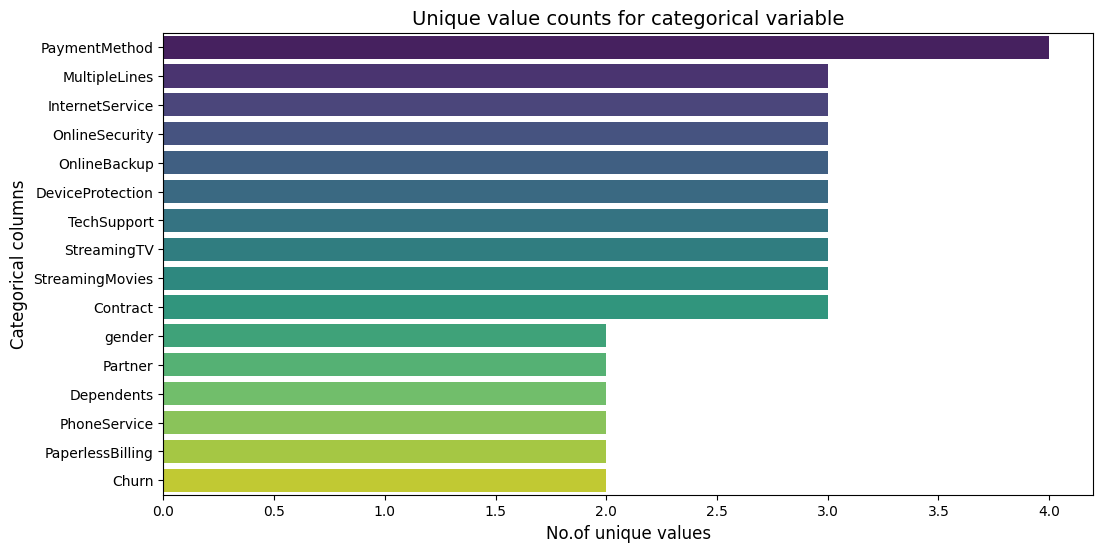

In [12]:
unique_values_df.drop('customerID',axis=1,inplace=True, errors='ignore')
plt.figure(figsize=(12,6))

sns.barplot(
    x="Unique_values",
    y = 'Column',
    data = unique_values_df.sort_values(by="Unique_values", ascending=False),
    palette='viridis'
)

plt.title("Unique value counts for categorical variable", fontsize=14)
plt.xlabel("No.of unique values", fontsize=12)
plt.ylabel("Categorical columns", fontsize=12)

plt.show()

### Distribution of categorical vatiables

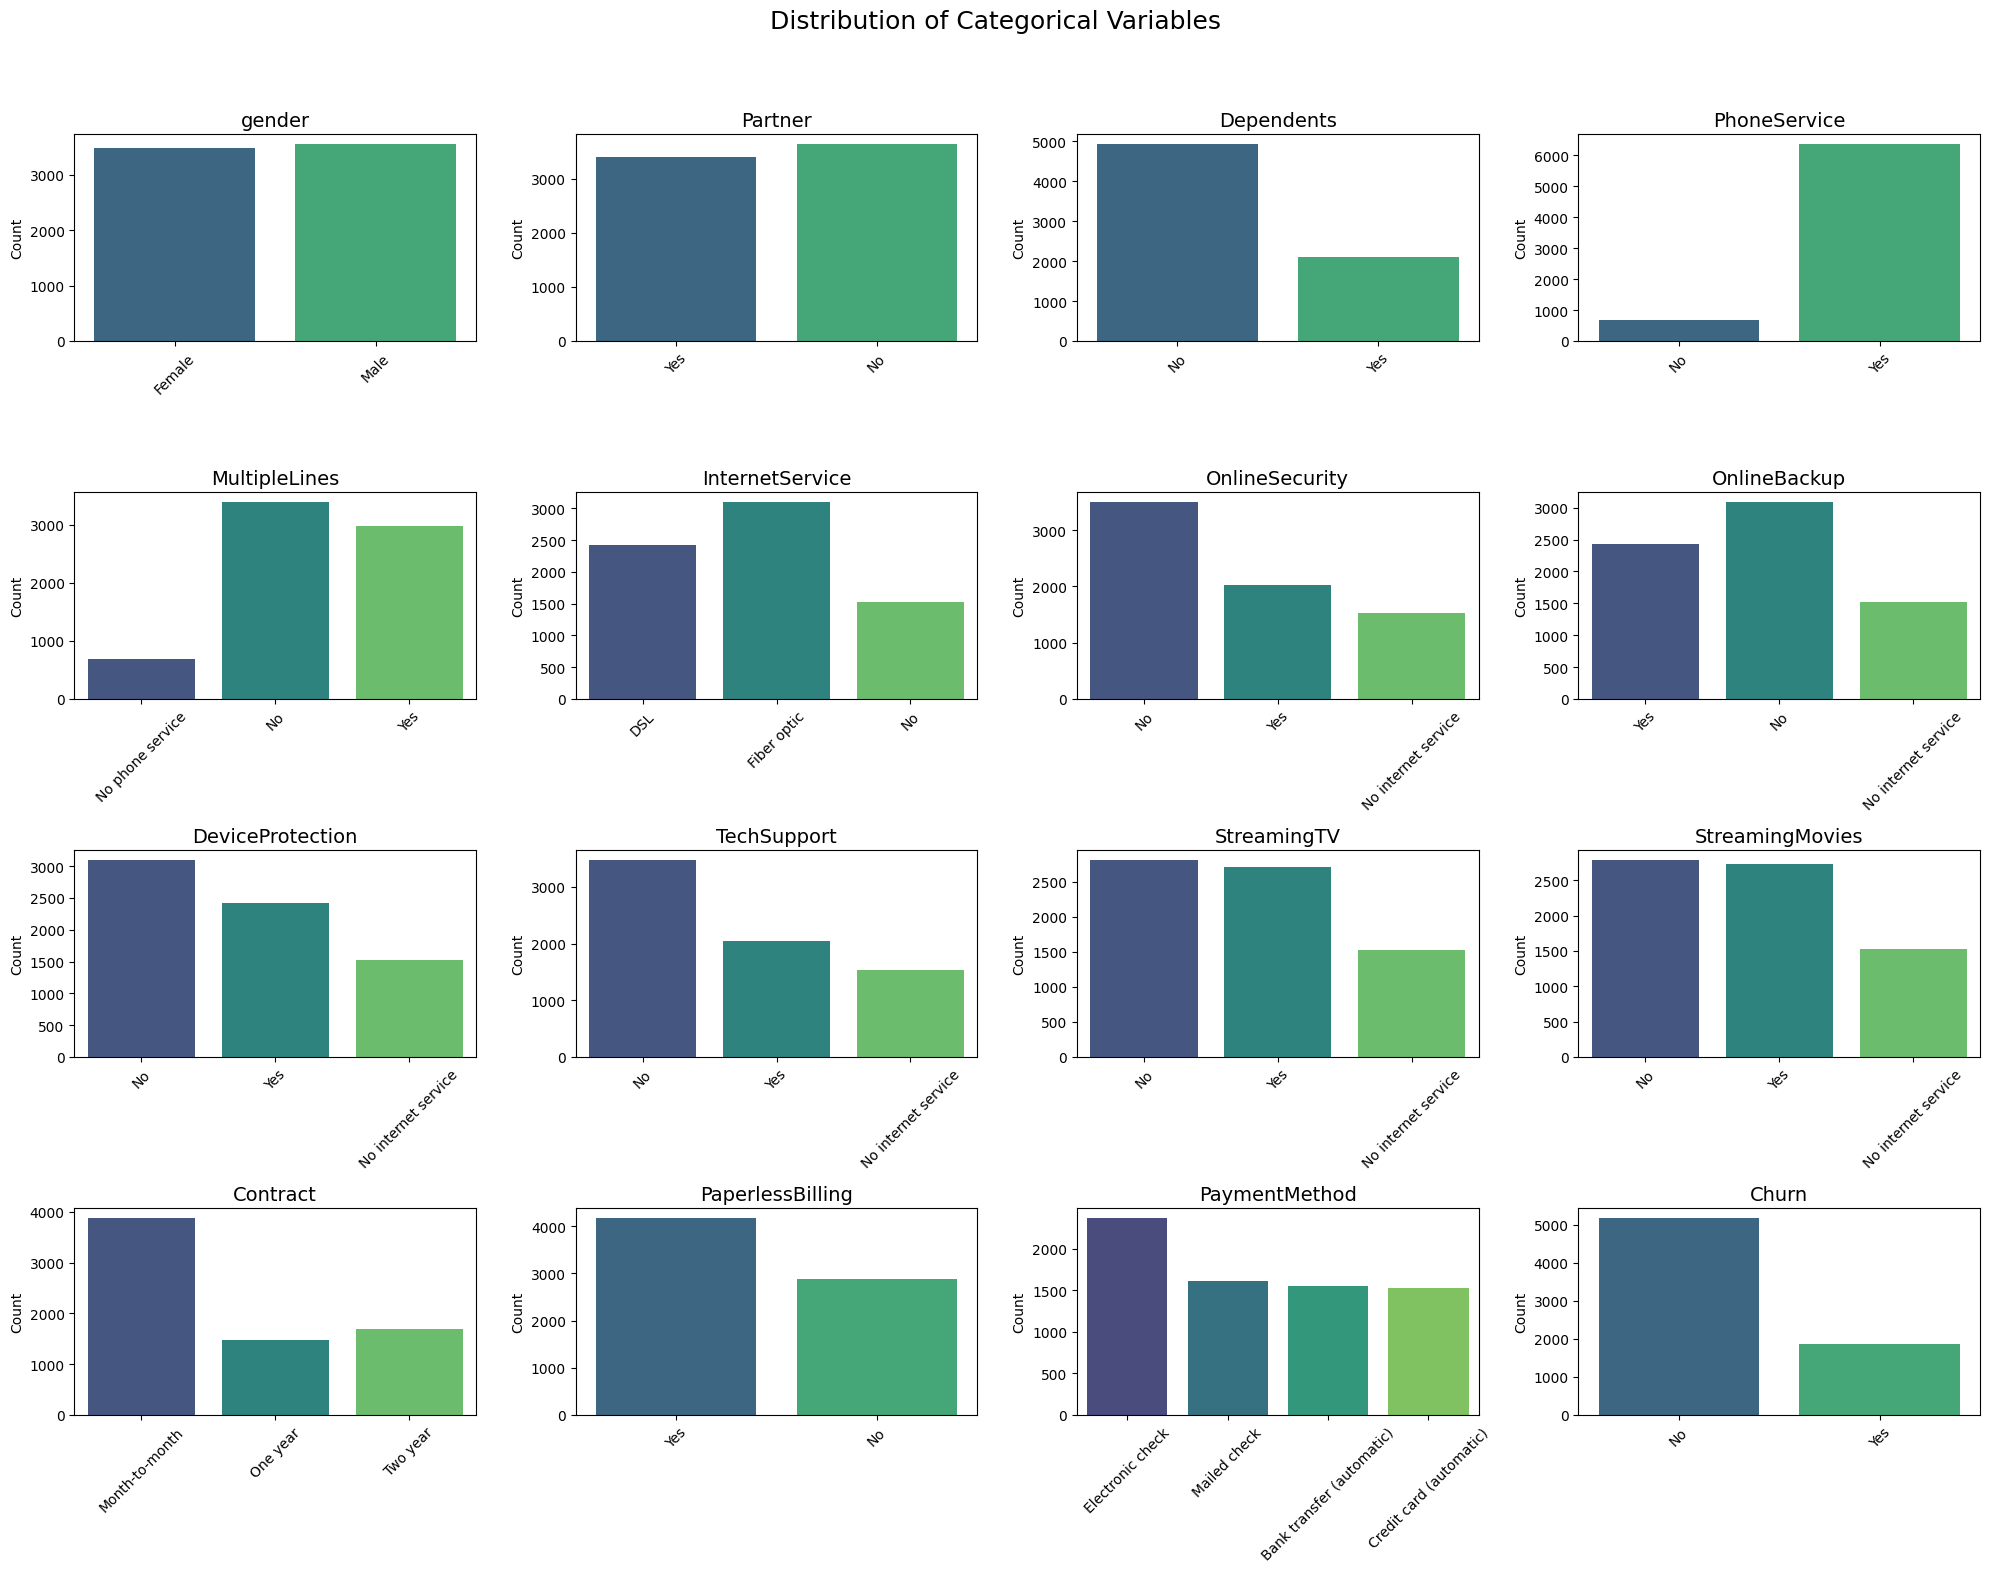

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(20,16))
fig.suptitle("Distribution of Categorical Variables", fontsize=18)

axes = axes.flatten()

for i, col in enumerate(unique_values_df['Column']):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Relation between categorical and churn

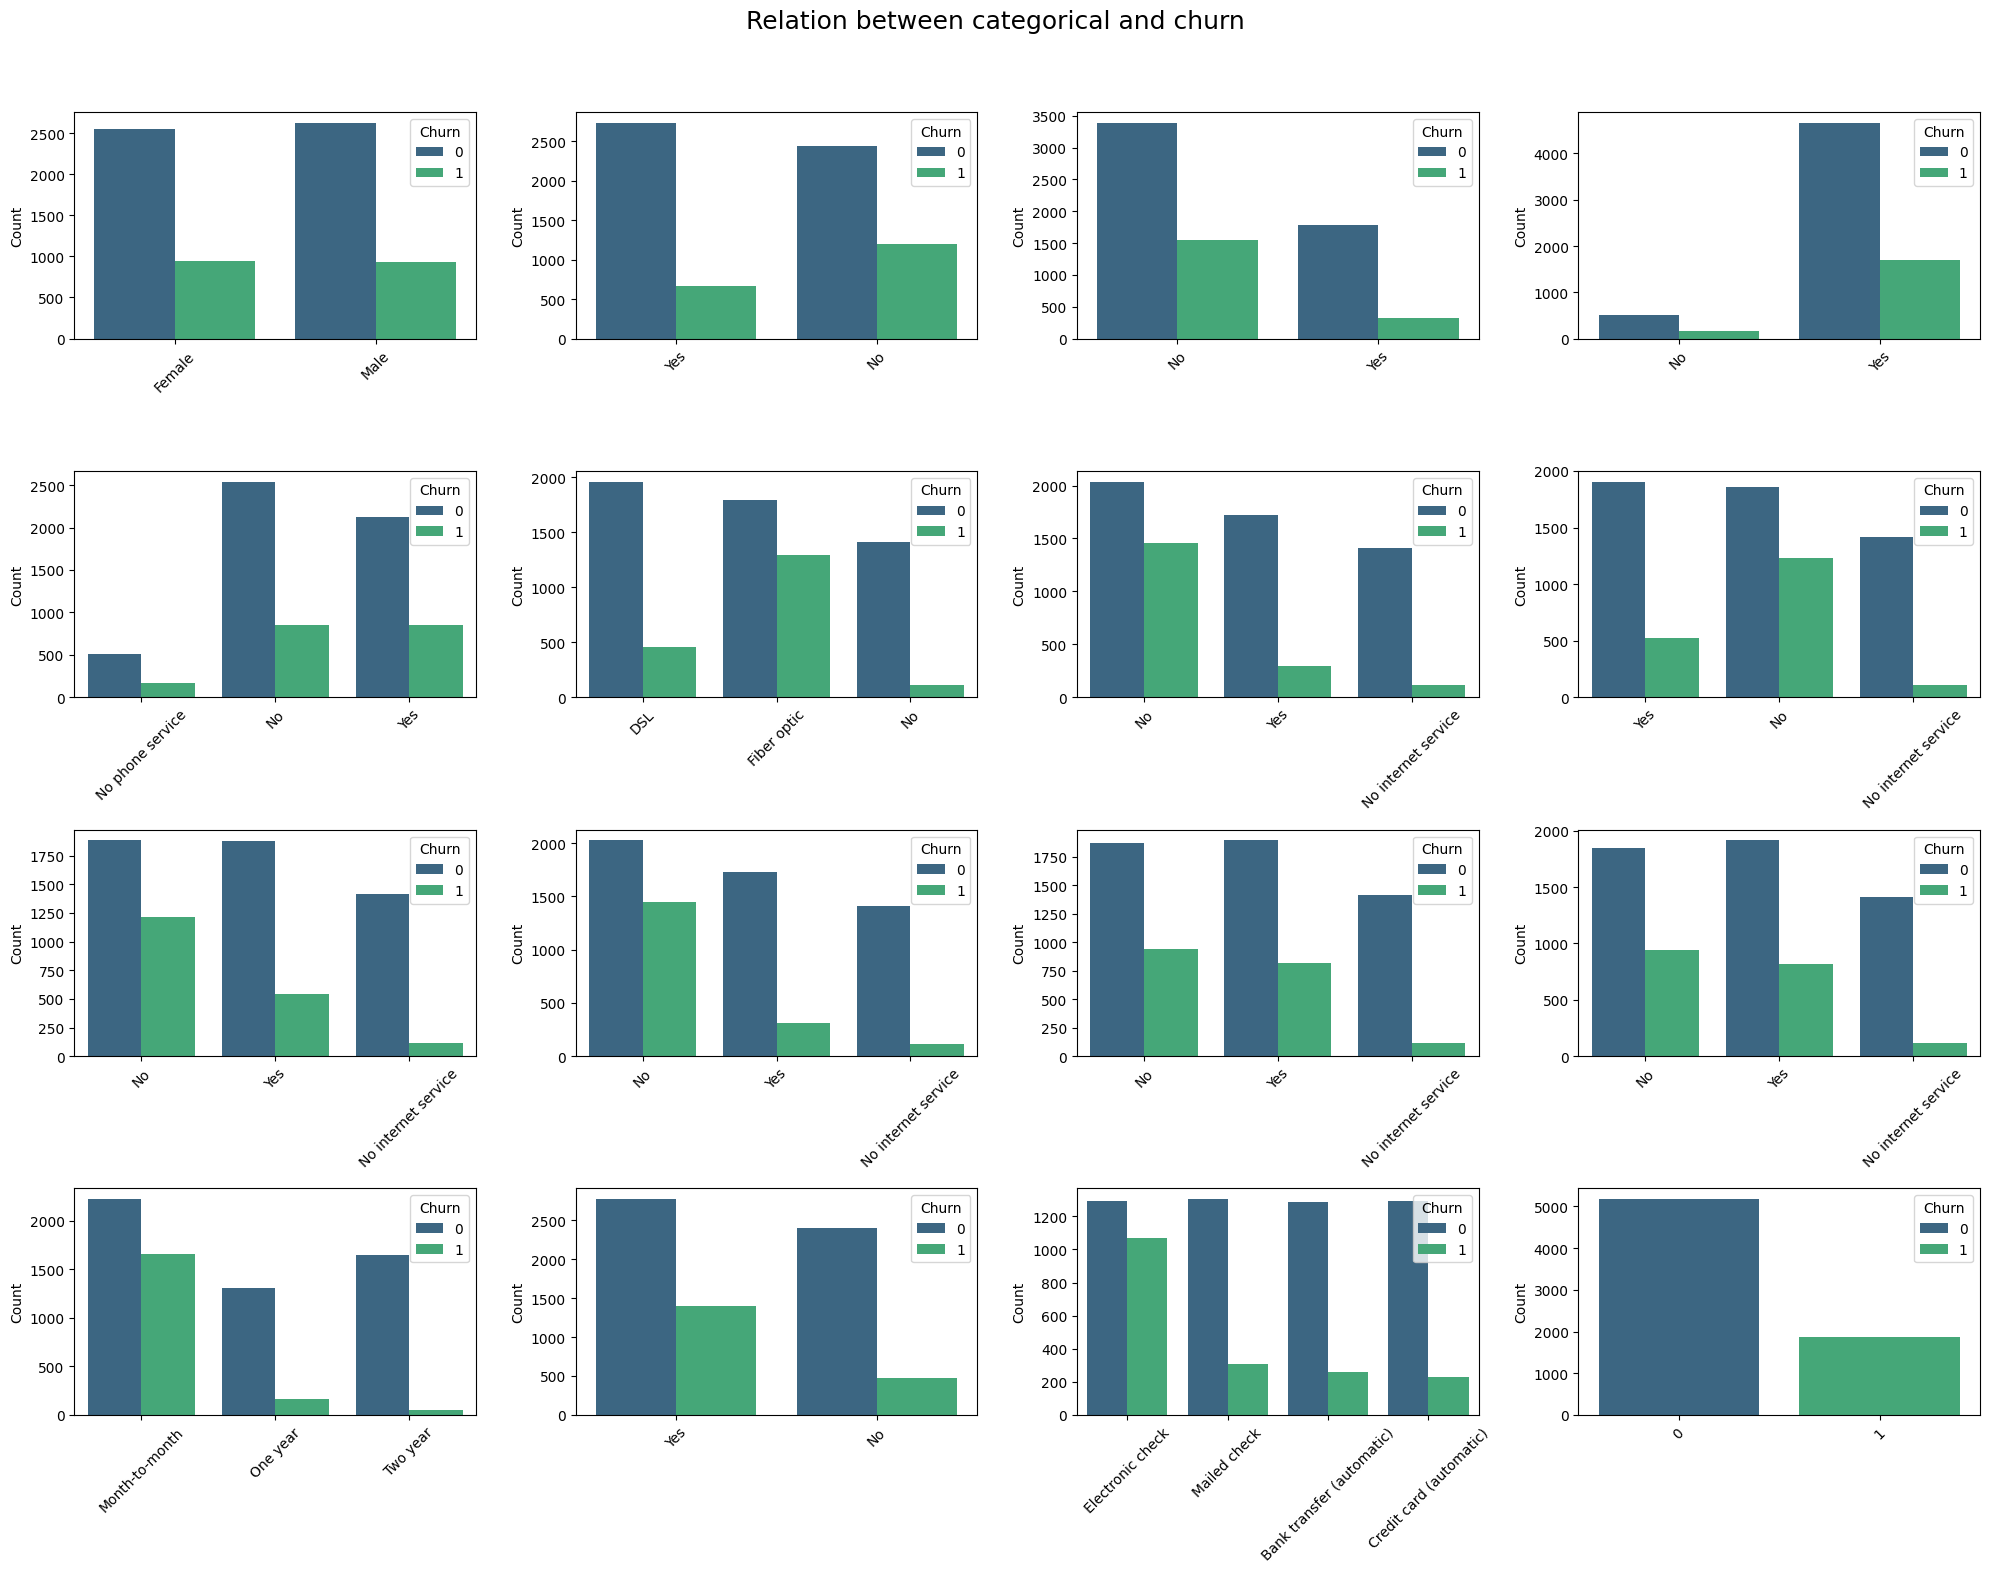

In [49]:
fig, axis = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle("Relation between categorical and churn", fontsize=18)
axis = axis.flatten()
for i, col in enumerate(unique_values_df['Column']):
    sns.countplot(x=df[col], hue = df['Churn'], ax=axis[i],palette = 'viridis')
    axis[i].set_xlabel("")
    axis[i].set_ylabel("Count")
    axis[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Identify the numeric variables

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [16]:
print(numeric_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


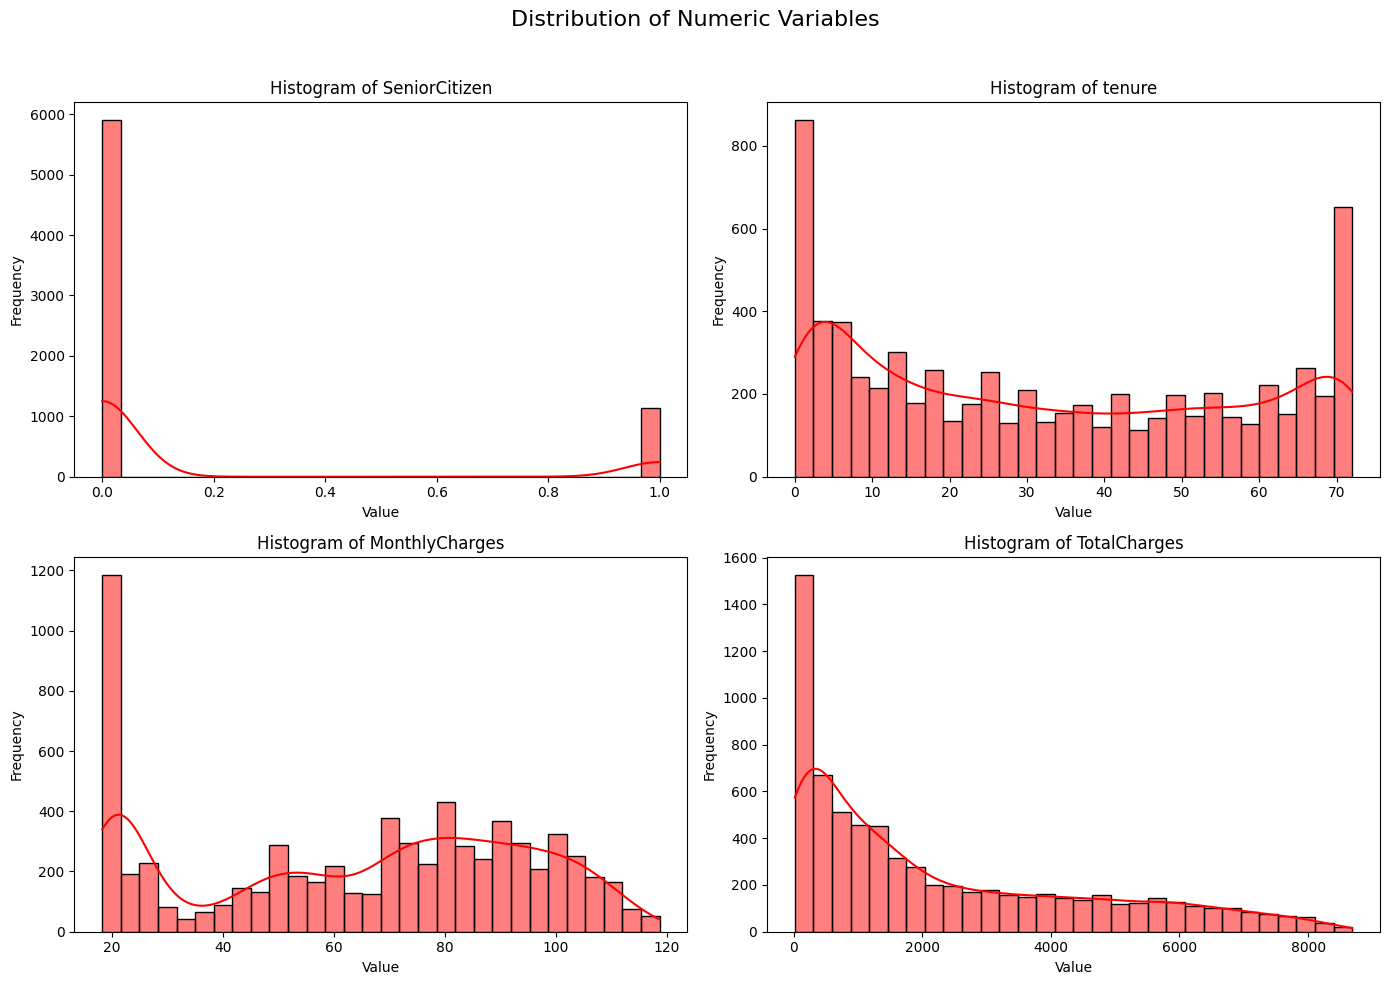

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Numeric Variables", fontsize=16)
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax = axes[i], color='red')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel("Value")    
    axes[i].set_ylabel("Frequency")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


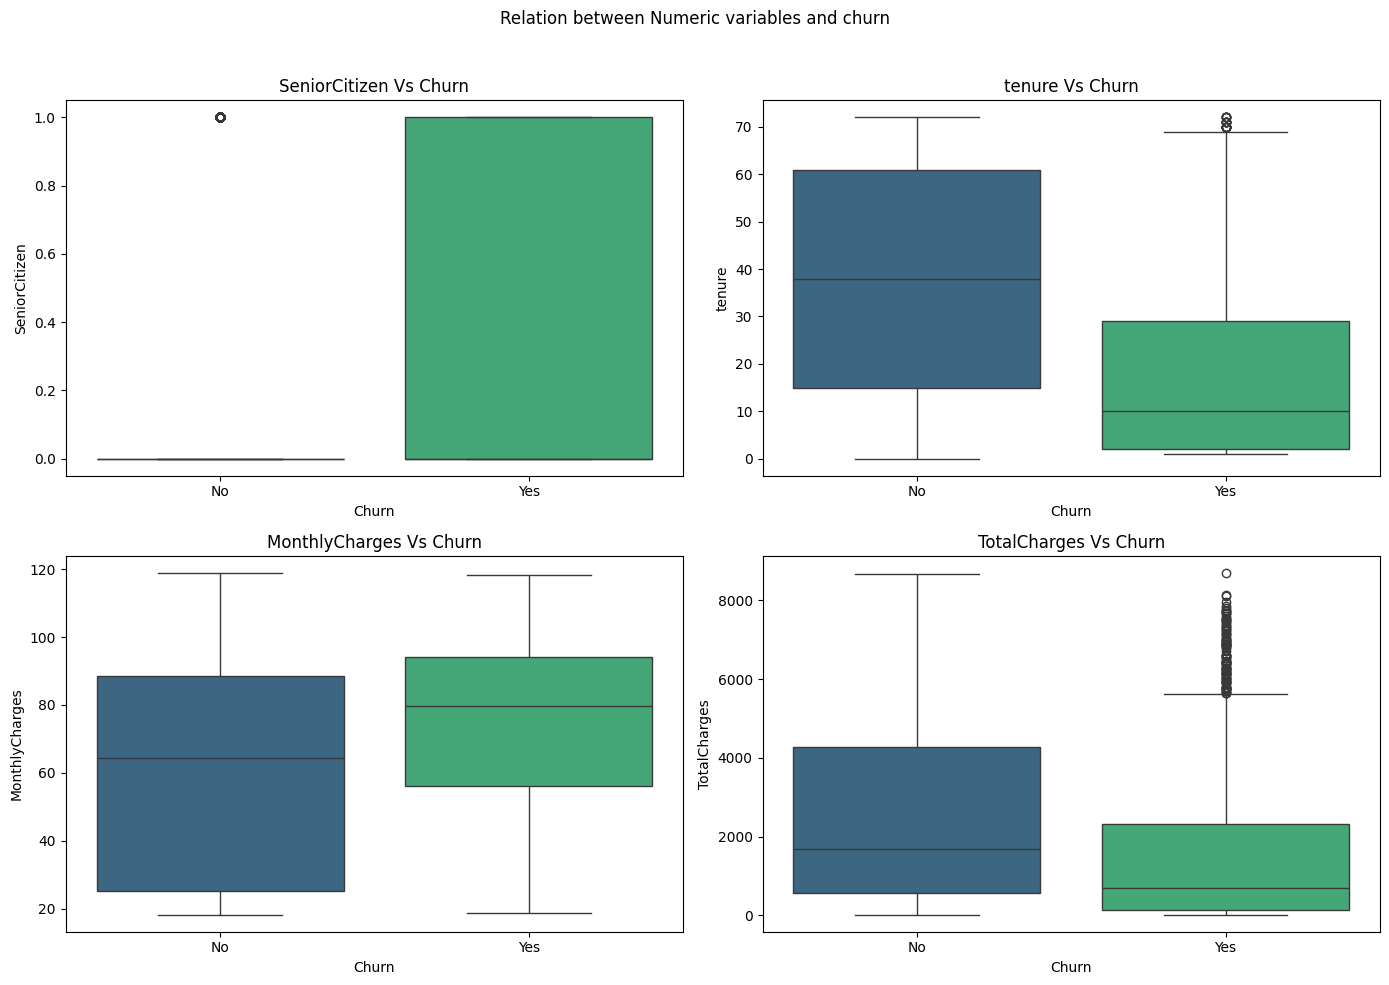

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Relation between Numeric variables and churn")
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df["Churn"], y=df[col], ax=axes[i],palette='viridis')
    axes[i].set_title(f"{col} Vs Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(col)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Distribution of numeric columns
### Shapiro-Wilk Normality Test

In [30]:
for col in numeric_columns:
    stat, p = shapiro(df[col].dropna())
    if p>0.05:
        result = "Likely Normally distributed"
    else:
        result = "Not likely normally distributed"
    print(f"{col}: \n P-value:{p:.3f} -> {result}\n")

SeniorCitizen: 
 P-value:0.000 -> Not likely normally distributed

tenure: 
 P-value:0.000 -> Not likely normally distributed

MonthlyCharges: 
 P-value:0.000 -> Not likely normally distributed

TotalCharges: 
 P-value:0.000 -> Not likely normally distributed



# 📊 Summary & Observations
* Categorical Variables: The categorical variables do not have high cardinality. However, their relationship with the target variable (Churn) suggests that they significantly influence customer churn.
* Imbalanced Target Variable: The target variable, Churn, exhibits an imbalanced distribution, which may impact model performance and require resampling techniques.
* Impact of Numerical Variables: The numerical features also show a strong impact on churn, indicating their importance in predictive modeling.
* Normality of Numerical Variables: The numerical features do not follow a normal distribution, suggesting the potential need for data transformations such as log or Box-Cox transformations for improved model performance.

# Model

In [31]:
# Convert target value to binary

df['Churn'] = df['Churn'].map({"No":0, 
                               "Yes": 1})

In [32]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [33]:
X_train, X_Val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Data processing pipeline

In [40]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

### Hyperparameter optimization

In [43]:
param_grid = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'classifier__learning_rate': [0.01, 0.1, 0.2]},
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10]},
    'K-Nearest Neighbors': {'classifier__n_neighbors': [3, 5, 7]}
}

best_models = {}
model_scores = []

for model_name, model in models.items():
    print(f"🔍 Training & Tuning {model_name}...")
    
    # Create full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform GridSearch for best parameters
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_Val)
    
    # Evaluate model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Store scores
    model_scores.append([model_name, accuracy, precision, recall, f1])

🔍 Training & Tuning Logistic Regression...
🔍 Training & Tuning Random Forest...
🔍 Training & Tuning Gradient Boosting...
🔍 Training & Tuning Support Vector Machine...
🔍 Training & Tuning K-Nearest Neighbors...


In [44]:
scores_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
scores_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.799148,0.642633,0.548128,0.591631
1,Random Forest,0.788502,0.634752,0.478610,0.545732
2,Gradient Boosting,0.802697,0.669014,0.508021,0.577508
3,Support Vector Machine,0.779986,0.600629,0.510695,0.552023
4,K-Nearest Neighbors,0.753726,0.538682,0.502674,0.520055


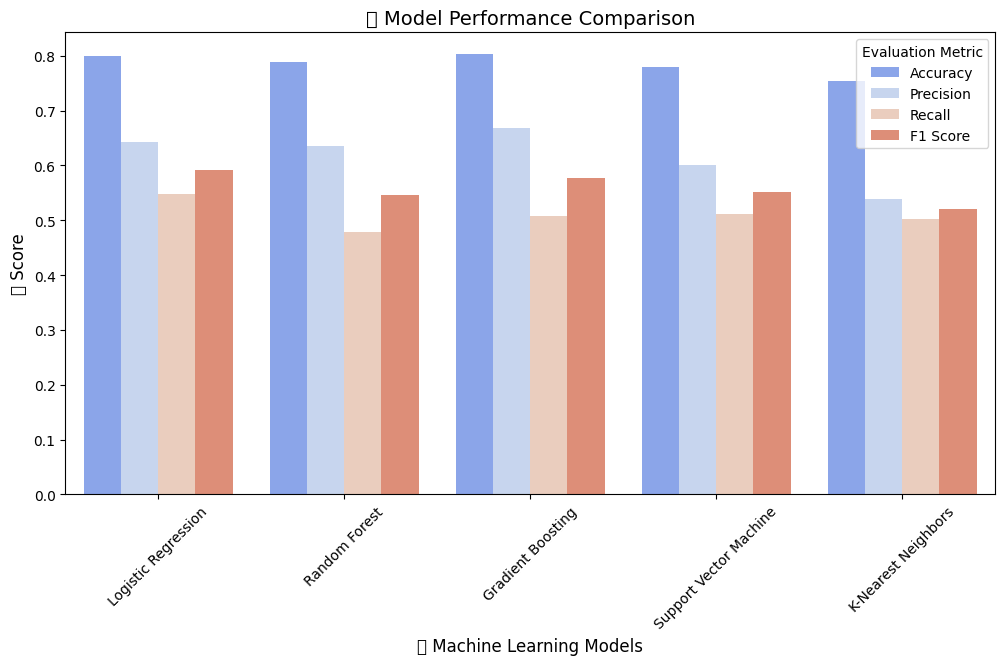

In [45]:
plt.figure(figsize=(12, 6))

# Melt the scores dataframe for better visualization
scores_melted = scores_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a bar plot
sns.barplot(x="Model", y="Score", hue="Metric", data=scores_melted, palette="coolwarm")

# Add labels and title
plt.title("📊 Model Performance Comparison", fontsize=14)
plt.xlabel("🏆 Machine Learning Models", fontsize=12)
plt.ylabel("📈 Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Evaluation Metric")

# Show plot
plt.show()